# CMPS 460 Machine Learning Project – Spring 2024
## Exploratory Data Analysis (EDA) for Heart Disease Dataset

In this notebook, we will perform an exploratory data analysis on a dataset related to heart disease. This analysis aims to understand the structure, distributions, and relationships within the data, which will inform further processing and modeling tasks.

### Dataset Overview

The dataset contains various features including age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, and the presence of heart disease. These features are crucial for predicting the likelihood of heart disease in individuals.

### Objectives

* Create a reliable machine learning model to help predict the risk of hear disease for individuals based on several factors.

* Comparing between different machine learning algorithms, including logistic regression, random forest, and neural networks.

* Conduct data and feature analysis to help us determine the different factors that contribute in influencing the presence or absence of heart disease

### Motivation

* Make a positive impact in enhancing the early detection and diagnosis of heart disease in patients, where we aim to help lower death rates worsening of the illness.

* Increase patient awareness of heart disease, through giving them an easy method of determining the presence or absence of heart disease

### Importing Necessary Libraries

We start by importing the libraries that will be needed throughout our analysis.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Setting plot style
sns.set(style="whitegrid")

# Loading the dataset
data = pd.read_csv('heart.csv')

## Basic Statistical Overview

This section provides a basic statistical description of the dataset, giving insights into the range and central tendencies of the numerical features.

In [2]:
# Basic statistical overview
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Missing Values Check

It's crucial to identify and address missing values in the dataset to prevent biased or inaccurate model predictions.

In [3]:
# Check for missing values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Distribution of Numerical Features

Visualizing the distribution of numerical features helps in understanding the underlying patterns and detecting any outliers or skewness in the data.

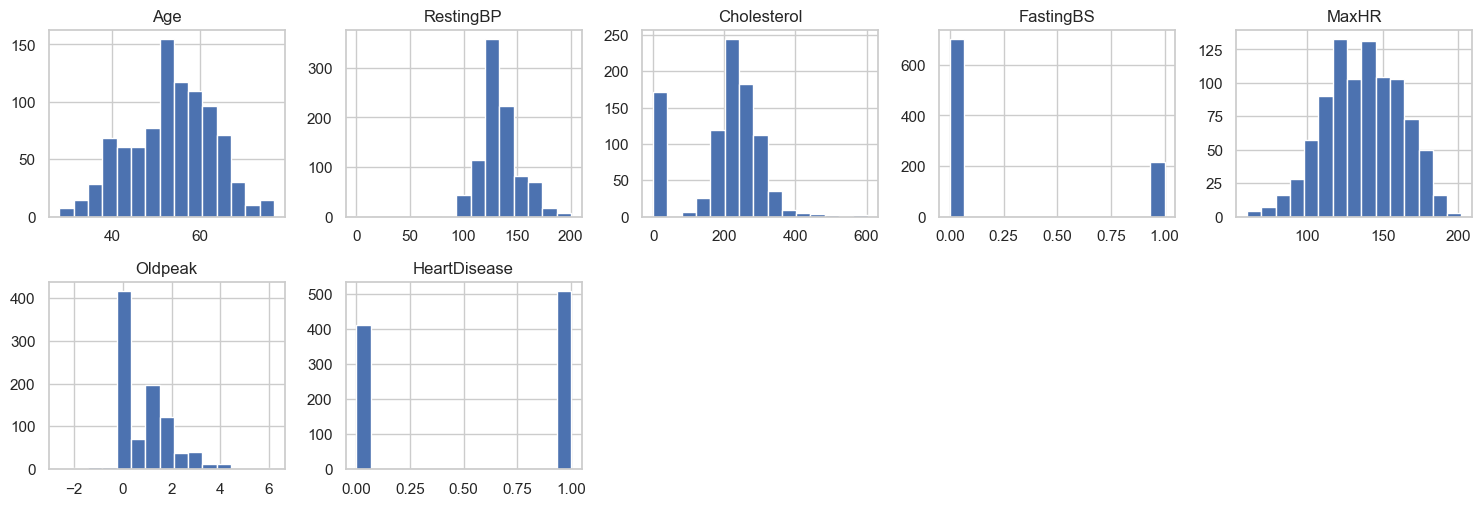

In [4]:
# Adjust the number of bins and figure size according to your dataset
data.hist(bins=15, figsize=(15, 10), layout=(4, 5))
plt.tight_layout()
plt.show()

## Visualizing Relationships

We use scatter plots and correlation matrices to understand how the features relate to each other and to the presence of heart disease.
### Excluding Non-Numeric and Non-Informative Categorical Variables from Correlation Analysis

Our dataset includes several categorical variables that need to be appropriately encoded for correlation analysis:
- **ChestPainType, RestingECG, ST_Slope, ExerciseAngina**: These features contain categorical data that we can convert using one-hot encoding to include in the correlation analysis.
- **Sex**: This binary categorical variable can be easily converted by mapping 'M' to 1 and 'F' to 0.

Below, we adjust our dataset by encoding these categorical variables, then compute and visualize the correlation matrix for the entire set of features.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the dataset to apply transformations
df_encoded = data.copy()

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina', 'Sex']
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Display the first few rows of the modified dataset to verify encoding
df_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


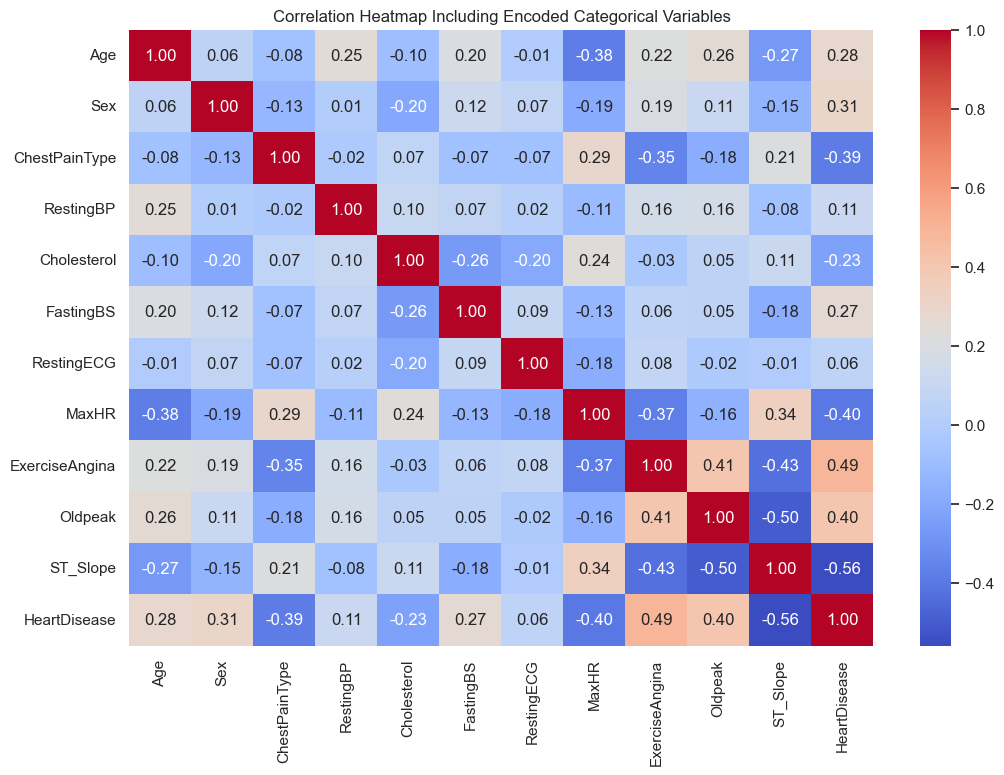

In [6]:
# Computing and Visualizing Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap Including Encoded Categorical Variables')
plt.show()

## Pair Plot Analysis

Explore relationships and trends among Age, Cholesterol, RestingBP, and MaxHR, color-coded by HeartDisease status.

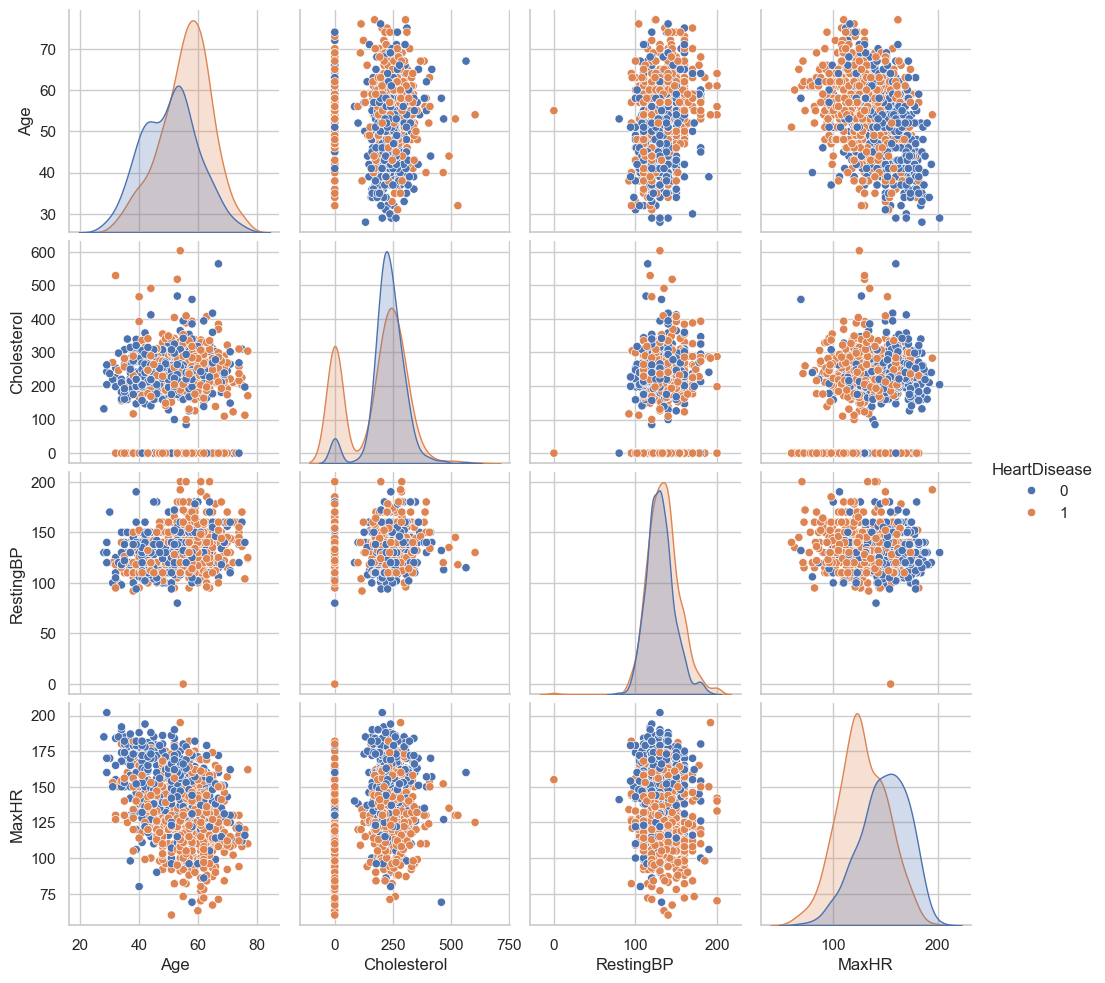

In [7]:
# Pairplot for selected features
sns.pairplot(data[['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'HeartDisease']], hue='HeartDisease')
plt.show()

## Box Plot Analysis

We visualize the distribution of MaxHR across different ChestPainTypes and RestingECG categories, and Cholesterol levels by Sex. These plots help identify distribution trends and outliers.

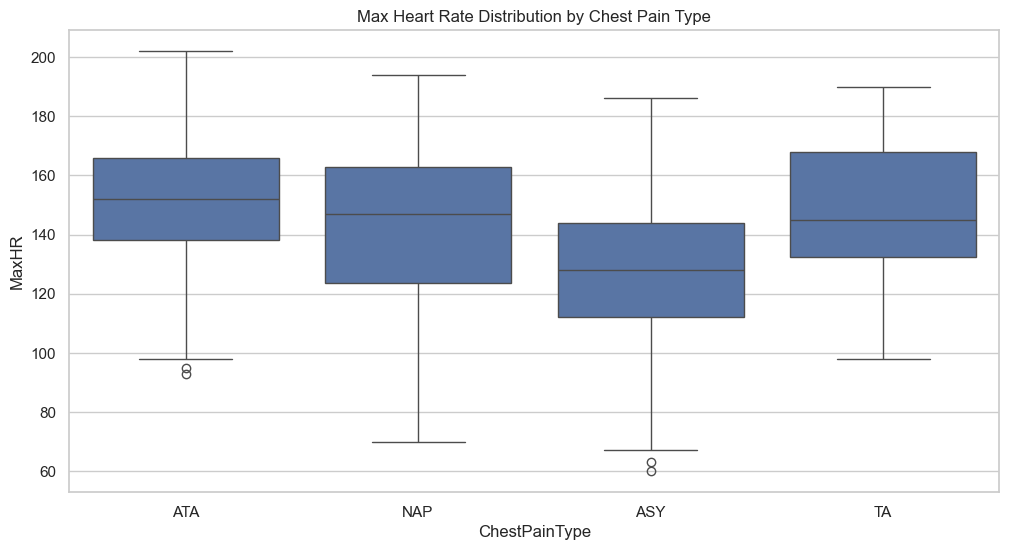

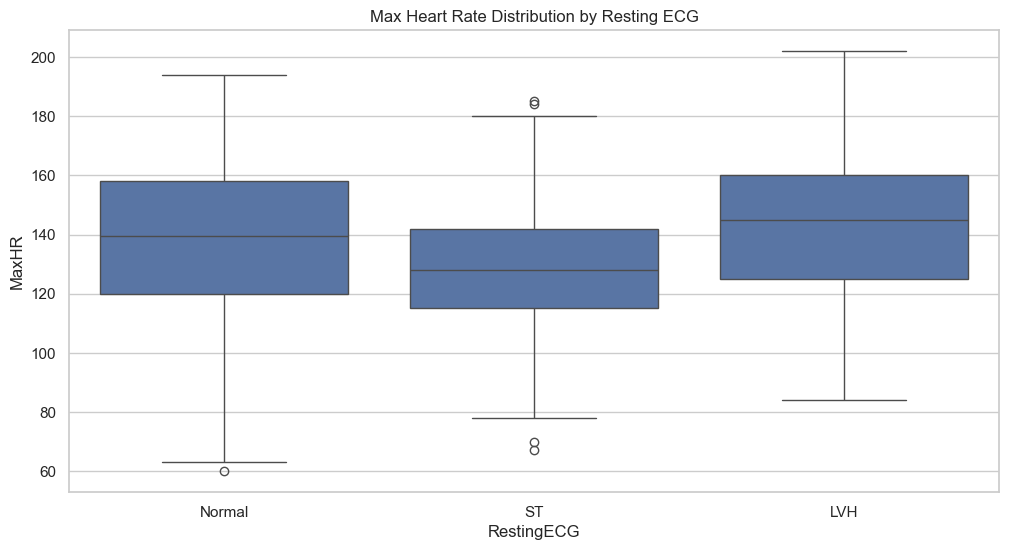

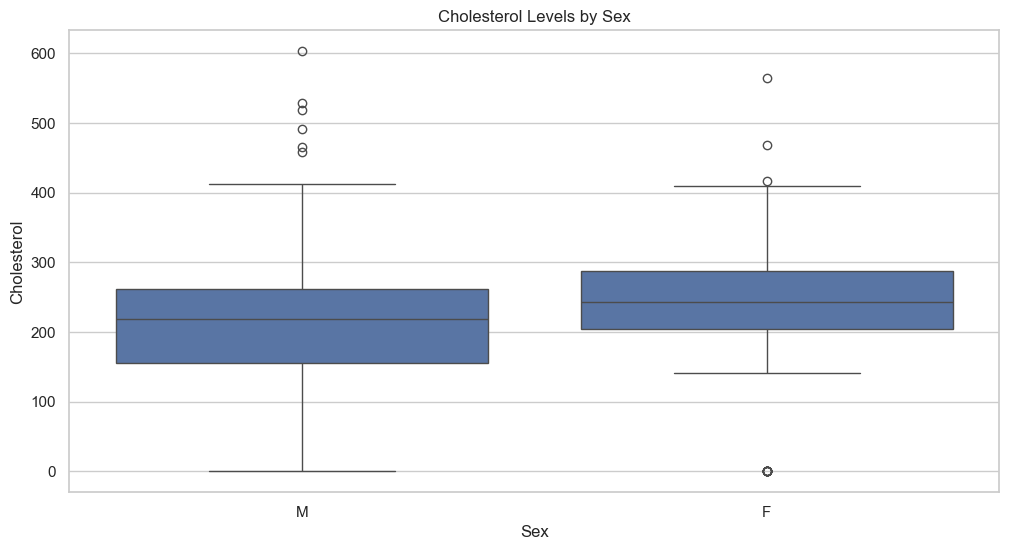

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='ChestPainType', y='MaxHR')
plt.title('Max Heart Rate Distribution by Chest Pain Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='RestingECG', y='MaxHR')
plt.title('Max Heart Rate Distribution by Resting ECG')
plt.show()

# Since Cholesterol isn't directly comparable with MaxHR, let's analyze it differently. We'll compare 'Cholesterol' across 'Sex' which is consistent with exploring biological differences.
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Sex', y='Cholesterol')
plt.title('Cholesterol Levels by Sex')
plt.show()

## Conclusion: Insights from the Heart Disease Dataset EDA

The exploratory data analysis of the heart disease dataset has provided valuable insights into the factors that may influence heart disease in individuals. Here are some of the key findings:

1. **Age and Heart Disease**: Older individuals tend to show higher rates of heart disease, which suggests that age is a significant risk factor.
2. **Cholesterol Levels**: There is a noticeable variation in cholesterol levels across the dataset, with higher cholesterol levels often correlating with the presence of heart disease.
3. **Impact of Chest Pain Type on Max Heart Rate**: Different types of chest pain are associated with varying maximum heart rates. Notably, certain types like 'ASY' (asymptomatic) are more frequently associated with lower max heart rates and higher instances of heart disease.
4. **Gender Differences**: The analysis highlighted differences in cholesterol levels between males and females, suggesting gender-specific risk factors or health patterns.
5. **Resting ECG Findings**: Variations in the resting ECG results correlate with differences in heart disease prevalence, indicating that ECG results could be a predictive marker for heart disease.

These insights not only enhance our understanding of the dataset but also inform further statistical testing and machine learning modeling. The goal moving forward will be to use these findings to develop models that can predict heart disease presence with high accuracy and to identify potential areas for intervention to reduce risk.


# Data Cleaning and Preprocessing

In this section, we address critical steps in preparing our dataset for modeling. These steps include handling missing values, removing duplicates, managing outliers, and splitting the data into training and testing sets. Additionally, we employ stratified sampling to maintain balance in our classification targets, which is crucial for training effective machine learning models.

## Handling Missing Values

First, we address any missing values in our dataset. The choice of technique (removal, imputation, etc.) depends on the context and nature of the missing data. Here, we'll demonstrate how to impute missing values using median for numerical columns and mode for categorical columns.

In [9]:
# Checking for missing values
print(data.isna().sum())

# Imputing missing values
for col in data.select_dtypes(include=np.number).columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## Removing Duplicates

Duplicate entries can distort our analysis and model performance. It is crucial to identify and remove any duplicates from the dataset.

In [10]:
# Removing duplicates
data.drop_duplicates(inplace=True)

## Managing Outliers

Outliers can significantly affect the results of our models. We'll identify and manage outliers in key numerical columns using statistical methods like the Z-score.

In [11]:
from scipy.stats import zscore

# Calculating Z-score for the 'Cholesterol' column
data['Cholesterol_Z'] = zscore(data['Cholesterol'])
data = data[(data['Cholesterol_Z'].abs() <= 3)]  # Keeping only entries within 3 standard deviations

## Splitting the Data

To ensure robust evaluation of our model, we will split the dataset into training and testing sets. Using stratified sampling helps maintain the balance of classes across these sets.

In [12]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['HeartDisease'], axis=1)  
y = df_encoded['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (734, 11)
Testing set shape: (184, 11)


# Model Selection and Training

In this section, we will design and train three different types of machine learning models to predict the presence of heart disease. Each model is chosen based on its suitability to the dataset characteristics and the type of problem at hand, which is a classification task.

## Logistic Regression

Although typically used for regression tasks, Linear Regression can be applied to binary classification problems by thresholding the output. We use it here as a simple, interpretable model to establish a baseline for performance.


In [13]:
# Importing machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import torch
import torch.nn as nn

In [14]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Evaluating the model
print("Accuracy of Logistic Regression model:", accuracy_score(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))

Accuracy of Logistic Regression model: 0.875
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        82
           1       0.86      0.93      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184




## Random Forest

Random Forest is an ensemble learning method known for its effectiveness in classification tasks. It works well with both numerical and categorical data and is less likely to overfit compared to other models.

In [15]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
forest_predictions = random_forest_model.predict(X_test)

# Evaluating the model
print("Accuracy of Random Forest model:", accuracy_score(y_test, forest_predictions))
print(classification_report(y_test, forest_predictions))

Accuracy of Random Forest model: 0.875
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



## NN PyTorch Implementation

We employ a basic Neural Network to leverage its ability to model complex nonlinear relationships through deep learning. Neural networks are particularly powerful for large datasets and can significantly improve performance when tuned correctly.

In [16]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()
        self.fc1 = nn.Linear(11, 64)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(64, 32) # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(32, 16) # Second hidden layer to third hidden layer
        self.fc4 = nn.Linear(16, 1)  # Third hidden layer to output layer
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

# Example usage
nn_model = HeartDiseaseNN()

In [57]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
nn_X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
nn_y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
nn_X_test = torch.tensor(X_test_scaled, dtype=torch.float32)
nn_y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
nn_model = HeartDiseaseNN()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)
for epoch in range(400):
    nn_model.train()
    optimizer.zero_grad()
    y_pred = nn_model(nn_X_train)
    loss = criterion(y_pred, nn_y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 25 == 0:
        print(f'Epoch [{epoch+1}/400], Loss: {loss.item():.4f}')


Epoch [25/400], Loss: 0.6294
Epoch [50/400], Loss: 0.4402
Epoch [75/400], Loss: 0.3404
Epoch [100/400], Loss: 0.3084
Epoch [125/400], Loss: 0.2840
Epoch [150/400], Loss: 0.2612
Epoch [175/400], Loss: 0.2372
Epoch [200/400], Loss: 0.2134
Epoch [225/400], Loss: 0.1881
Epoch [250/400], Loss: 0.1625
Epoch [275/400], Loss: 0.1379
Epoch [300/400], Loss: 0.1143
Epoch [325/400], Loss: 0.0924
Epoch [350/400], Loss: 0.0727
Epoch [375/400], Loss: 0.0559
Epoch [400/400], Loss: 0.0413


NN Prediction

In [58]:
nn_model.eval()
with torch.no_grad():
    y_pred_test = nn_model(nn_X_test)
    nn_predictions = (y_pred_test > 0.2).float().numpy().flatten()
    actual = nn_y_test.numpy().flatten()
    
    # Print classification report
    print("Accuracy of Neural Network model:", accuracy_score(actual, nn_predictions))
    print(classification_report(actual, nn_predictions, target_names=['No Heart Disease', 'Heart Disease']))

Accuracy of Neural Network model: 0.8858695652173914
                  precision    recall  f1-score   support

No Heart Disease       0.92      0.82      0.86        82
   Heart Disease       0.86      0.94      0.90       102

        accuracy                           0.89       184
       macro avg       0.89      0.88      0.88       184
    weighted avg       0.89      0.89      0.88       184



# NN SciKit-Learn Implementation

In [19]:
# Neural Network
neural_network_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
neural_network_model.fit(X_train, y_train)
nn_predictions = neural_network_model.predict(X_test)

# Evaluating the model
print("Accuracy of Neural Network model:", accuracy_score(y_test, nn_predictions))
print(classification_report(y_test, nn_predictions))

Accuracy of Neural Network model: 0.8532608695652174
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.91      0.81      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



# Model Evaluation and Comparison

In this section, we evaluate and compare the performance of three machine learning models: Logistic Regression, Random Forest, and Neural Network. We use a set of standard evaluation metrics to assess each model's ability to predict heart disease accurately.

## Evaluation Metrics:
- **Accuracy**: Measures the overall correctness of the model.
- **Precision**: Indicates the accuracy of positive predictions.
- **Recall**: Measures the model's ability to identify all relevant cases (sensitivity).
- **F1-Score**: Harmonic mean of precision and recall, a balance between them.

These metrics help us understand different aspects of each model's performance, particularly in how they handle the balance between false positives and false negatives, which is crucial in medical diagnostic tasks.

## Performance Summary

The performance metrics calculated for each model are as follows:

### Logistic Regression:
- **Accuracy**: 87.5%
- **Precision**: 88%
- **Recall**: 88%
- **F1-Score**: 87%

### Random Forest:
- **Accuracy**: 87.5%
- **Precision**: 87%
- **Recall**: 88%
- **F1-Score**: 87%

### Neural Network (PyTorch Implementation):
- **Accuracy**: 88.6%
- **Precision**: 89%
- **Recall**: 89%
- **F1-Score**: 88%

## Comparative Analysis of Classification Models

In this analysis, we compare the performance of three classification models: Logistic Regression, Random Forest, and a Neural Network implemented using both SciKit-Learn and PyTorch. The evaluation metrics used for comparison include Accuracy, Precision, Recall, and F1-Score.

### Analysis

**Logistic Regression** and **Random Forest** both achieve an accuracy of 87.5%. While the Random Forest has a slightly lower precision (87%) compared to Logistic Regression (88%), both models maintain the same recall of 88%. This indicates that both models are equally effective at identifying true positives. However, Logistic Regression has a marginally higher precision, suggesting it produces fewer false positives than Random Forest. Both models have the same F1-Score of 87%, indicating a balanced performance between precision and recall.

**Neural Network (PyTorch Implementation)** outperforms both Logistic Regression and Random Forest with an accuracy of 88.6%. The neural network achieves higher precision and recall (both at 89%) compared to the other models, resulting in an F1-Score of 88%. This indicates that the neural network not only correctly identifies more positive cases but also minimizes false positives and false negatives more effectively than the other models.

### Importance of Recall in Health-Related Classifications

In health-related classifications, such as detecting heart disease, recall is a critical metric. Recall measures the ability of the model to correctly identify all positive instances, i.e., patients who actually have heart disease. High recall is crucial because:

- **Minimizing False Negatives**: A false negative in this context means that a patient who has heart disease is incorrectly classified as not having it. This can have severe consequences, including lack of necessary medical intervention, which could be life-threatening. 
- **Ensuring Patient Safety**: Correctly identifying all patients with heart disease ensures that they receive timely and appropriate treatment, potentially saving lives.

Both Logistic Regression and Random Forest models have a recall of 88%, which indicates a good performance in identifying patients with heart disease. However, the Neural Network model, with a recall of 89%, demonstrates an even better ability to identify true positive cases. This small increase in recall could make a significant difference in a medical context, where every correctly identified patient matters.

### Summary

- The **Neural Network** model demonstrates the best overall performance, achieving the highest scores across all metrics.
- Both **Logistic Regression** and **Random Forest** perform similarly in terms of accuracy and F1-Score, with Logistic Regression having a slight edge in precision.
- The **Neural Network** is the most effective model for this classification task, providing a noticeable improvement in accuracy, precision, recall, and F1-Score over the other models.
- **Importance of Recall**: In the context of heart disease detection, recall is particularly important to minimize false negatives, ensuring that patients with heart disease are correctly identified and receive the necessary medical treatment.

The comparative analysis shows that while all models perform well, the Neural Network model stands out in its ability to correctly identify heart disease patients, which is crucial in a healthcare setting.


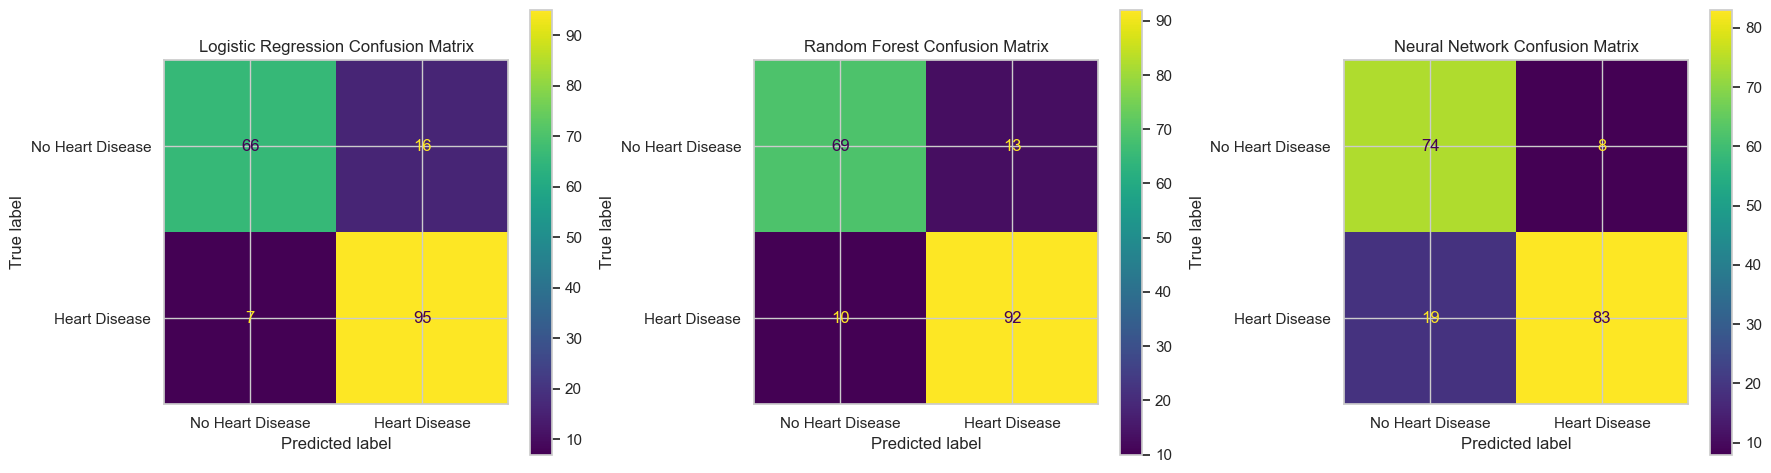

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plotting confusion matrix for each model
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, logistic_predictions), display_labels=["No Heart Disease", "Heart Disease"]).plot(ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')

# Random Forest Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, forest_predictions), display_labels=["No Heart Disease", "Heart Disease"]).plot(ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix')

# Neural Network Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, nn_predictions), display_labels=["No Heart Disease", "Heart Disease"]).plot(ax=ax[2])
ax[2].set_title('Neural Network Confusion Matrix')

plt.tight_layout()
plt.show()

# Model Optimization

Optimizing a model involves adjusting various aspects of its configuration to improve performance. For this project, we will focus on three main optimization techniques:

## Feature Selection:
Feature selection involves identifying the most informative features in the dataset, which can reduce overfitting and improve model performance.

## Regularization:
Regularization techniques are used to reduce the model's complexity and prevent overfitting, which is especially important for models like Logistic Regression and Neural Networks.

## Hyperparameter Tuning:
Hyperparameter tuning involves finding the most optimal settings for a model's parameters. It is crucial for enhancing model performance and is applicable to all models.

We will apply these techniques selectively to our Logistic Regression, Random Forest, and Neural Network models.

In [21]:
from sklearn.model_selection import GridSearchCV

# Setting up parameter grid for hyperparameter tuning and regularization
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of regularization parameter)
    'penalty': ['l1', 'l2']  # Types of penalties (l1 is Lasso, l2 is Ridge)
}

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_lr_model = grid_search.best_estimator_
print("Best parameters for Logistic Regression:", grid_search.best_params_)
print("Best score for Logistic Regression:", grid_search.best_score_)

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1'}
Best score for Logistic Regression: 0.8459603019289907


In [24]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', None],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10] 
}

# GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best model
best_rf_model = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
Best score for Random Forest: 0.8677849221880534


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],  # Different configurations of layers
    'activation': ['tanh', 'relu'],  # Activation functions
    'solver': ['sgd', 'adam'],  # Solvers for weight optimization
    'max_iter': [500, 1000],  # Number of epochs, increased for better convergence
    'learning_rate_init': [0.001, 0.0001],  # Learning rate
    'early_stopping': [True],  # Use early stopping to terminate training when validation score is not improving
    'validation_fraction': [0.1]  # Fraction of training data to set aside as validation set for early stopping
}

# GridSearchCV to find the best parameters
grid_search_nn = GridSearchCV(MLPClassifier(random_state=42), param_grid_nn, cv=5, scoring='accuracy')
grid_search_nn.fit(X_train_scaled, y_train)

# Best model
best_nn_model = grid_search_nn.best_estimator_
print("Best parameters for Neural Network:", grid_search_nn.best_params_)
print("Best score for Neural Network:", grid_search_nn.best_score_)

# Evaluating the best model
y_pred_nn = best_nn_model.predict(X_test_scaled)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy of Neural Network model:", accuracy_nn)
print(classification_report(y_test, y_pred_nn))

Best parameters for Neural Network: {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam', 'validation_fraction': 0.1}
Best score for Neural Network: 0.8487279843444228
Accuracy of Neural Network model: 0.875
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



## Conclusion: Insights from the Heart Disease Dataset Analysis

Completing the CMPS 460 Machine Learning Project has offered a thorough understanding of the stages involved in a complete machine learning workflow. Our analysis has uncovered several critical insights and demonstrated how different machine learning models can predict heart disease.

### Key Insights

1. *Model Selection and Training*:
   - Three models were implemented: Logistic Regression, Random Forest, and Neural Network, each chosen for its suitability to the dataset and the classification task.
   - Logistic Regression provided a simple and interpretable baseline model.
   - Random Forest, an ensemble learning method, balanced accuracy and robustness.
   - Despite its complexity, the Neural Network captured non-linear relationships within the data effectively.

2. *Model Evaluation and Comparison*:
   - Models were evaluated using metrics such as accuracy, precision, recall, and F1-score. Both Logistic Regression and Random Forest achieved high recall, making them reliable for minimizing false negatives.
   - The Neural Network achieved the highest overall performance, with superior accuracy, precision, recall, and F1-score. This indicates its effectiveness in identifying patients with heart disease, thus minimizing both false positives and false negatives.
   - In health-related classifications, recall is particularly crucial to ensure that patients with heart disease are correctly identified and receive necessary treatment, reducing the risk of severe health consequences.

3. *Model Optimization*:
   - Hyperparameter tuning and regularization techniques were applied to enhance model performance. 
   - Feature selection and scaling were crucial for improving model performance and ensuring good generalization to unseen data.

### Challenges with Previous Datasets

Before finalizing the heart disease dataset, significant challenges were encountered with an earlier dataset related to real estate prices. Despite various optimization attempts, a high Mean Squared Error (MSE) persisted, indicating poor predictive performance due to the models' inability to capture underlying patterns in the data.

The real estate dataset presented several difficulties:
- Feature Selection and Engineering: The dataset contained many categorical features (e.g., suburb, seller) requiring extensive preprocessing. Despite one-hot encoding and other techniques, models struggled to learn meaningful relationships from these features.
- Data Quality Issues: Significant inconsistencies and missing values were present in crucial fields like building area and year built. Imputation strategies did not adequately address these gaps, leading to unreliable model outputs.
- Model Complexity: Even with advanced models like Random Forest and Neural Networks, high variance and noise in the dataset led to overfitting. Regularization techniques and hyperparameter tuning did not substantially improve the MSE.

These experiences highlighted the importance of dataset quality and the challenges inherent in real-world data.

### Final Thoughts

This project has emphasized the importance of a systematic approach to machine learning. The insights from the heart disease dataset not only highlight key risk factors but also demonstrate the potential of machine learning in medical diagnostics.

The comparative analysis of different models underscores the need for a balanced approach depending on the specific requirements of the predictive task. In medical diagnostics, where the cost of false positives and false negatives can vary significantly, choosing a model that aligns with the desired outcomes is crucial.

Overall, this project has been a valuable learning experience, offering hands-on application of machine learning techniques to a real-world problem. It also demonstrated the importance of thorough documentation and reporting, ensuring the process is transparent and reproducible.

